#### Question 1

**(a) Compute the Squared Euclidean distance between** $x^{(te)}$ **and each observation in** $\mathcal{D}$. **Report the squared distances. Do not use a computer to solve the problem.**

- Squared with Obs.1: $X_{1}^{2}+X_{2}^{2}+X_{3}^{2}=9$
- Squared with Obs.2: $X_{1}^{2}+X_{2}^{2}+X_{3}^{2}=4$
- Squared with Obs.3: $X_{1}^{2}+X_{2}^{2}+X_{3}^{2}=10$
- Squared with Obs.4: $X_{1}^{2}+X_{2}^{2}+X_{3}^{2}=5$
- Squared with Obs.5: $X_{1}^{2}+X_{2}^{2}+X_{3}^{2}=2$
- Squared with Obs.6: $X_{1}^{2}+X_{2}^{2}+X_{3}^{2}=6$

**(b) What is** $\hat{y}^{(3)}(x^{(te)},\mathcal{D})$? **Explain your reasoning.**

The 3 nearest observations for $x^{(te)}$ are observations points: 5, 2, 4, whose colors are respectively red, green and green.

Thus, $\hat{y}^{(3)}(x^{(te)},\mathcal{D})$ is green.

**(c) What is** $\hat{y}^{(1)}(x^{(te)},\mathcal{D})$? **Explain your reasoning.**

The nearest observations for $x^{(te)}$ are observations points: 5, whose color is green.

Thus, $\hat{y}^{(1)}(x^{(te)},\mathcal{D})$ is green.

**(d) Consider 2 new datasets** $\mathcal{D_1}$ **and** $\mathcal{D_2}$, **each with 6 obsevations, sampled by the same data-generating process that** $\mathcal{D}$ **was.**

**True or false: for a typical data-generating process,** 
$$Pr(\hat{y}^{(3)}(x^{(te)},\mathcal{D_1})=\hat{y}^{(3)}(x^{(te)},\mathcal{D_2}))>Pr(\hat{y}^{(1)}(x^{(te)},\mathcal{D_1})=\hat{y}^{(1)}(x^{(te)},\mathcal{D_2}))$$

True.

There is more randomness when only using $K=1$, as it only depends on the nearest point. Increasing the $K$ increases the robustness.

#### Question 2

**(a) True or false: typically, predictive error on training data will be lower with more flexible methods**
- True

**(b) Describe how predictive error on testing data changes as you use more and more flexible methods (in typical case).**
- The predictve error will decrease at first then go upwards as there will be overfitting brought by more and more flexible methods.

#### Question 3

**(a) Calculate** $f(0.5)$.

$\text{When}\ x=0.5$,
$$
\begin{align*}
[Y|X=0.5] &\sim \text{Uniform}(0.5+\cos\pi-0.1, 0.5+\cos\pi+0.1) \\
[Y|X=0.5] &\sim \text{Uniform}(-0.6, -0.4)
\end{align*}
$$
$\therefore \mathbb{E}[Y|X=x]=\mathbb{E}[Y|X=0.5]=-0.5$


**(b) Calculate** $\text{var}(Y|X=0.5)$

According to Question 3 Part (a), $[Y|X=0.5]$ follows $\text{Uniform}(-0.6,-0.4)$,

$\therefore\ \text{var}(Y|X=0.5)=\cfrac{1}{300}$

**(c) Use `numpy`'s random number generator to construct a simulated dataset of 100 samples drawn from the data-generating process above.**

- **there should be one predictor feature** $X$ **and one response** $Y$
- **X should be drawn uniformly from the interval [0,1]**
- **Y should be drawn from** $\text{Uniform}[X+\cos(2\pi X)-0.1,X+\cos(2\pi X)+0.1]$

**(i) The final dataset** $\mathcal{D}$ **should be stored as a data frame with 2 columns and 100 rows.**

**(ii) Use `LinearRegression` to estimate the regression function using ordinary lease squares on this dataset**

**(iii) Construct a scatter plot of X and Y for your simulated dataset. On the same axes, plot the regression function of** $\hat{f}$ **fitted by the ordinary lease squares. Also on the same axes, plot the true regression function** $f$. **As always, include horizontal axis label, vertical axis label, and a title. In this case, you should also include a legend**

**(iv) Report the value of** $\hat{f}(0.5, \mathcal{D})$


True regression function:
$$
\begin{align*}
\text{f}(x) &=\mathbb{E}[Y|X=x] \\
&=(X+\cos{2\pi X}-0.1+X+\cos{2\pi X}+0.1)/2 \\
&=X+\cos{2\pi X}
\end{align*}
$$

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
np.random.seed(503)

In [8]:
# generate 100 samples from Uniform(0,1)
X = np.random.uniform(0, 1, 100)
# generate Y based on X
Y = np.random.uniform(X+np.cos(2*np.pi*X)-0.1, X+np.cos(2*np.pi*X)+0.1)
df = pd.DataFrame({'X': X, 'Y': Y})
df.head()

,X,Y
0,0.020819,0.922770
1,0.463678,-0.542535
2,0.603478,-0.223665
3,0.788902,1.093571
4,0.658524,0.195389


In [14]:
# reshape data into 2-D array to fit LinearRegression
x_reshape = df['X'].values.reshape(-1,1)
y_reshape = df['Y'].values.reshape(-1,1)
# linear regression
model = LinearRegression()
model.fit(x_reshape, y_reshape)
df['y_pred'] = model.predict(x_reshape)
df.head()

,X,Y,y_pred
0,0.020819,0.922770,0.099935
1,0.463678,-0.542535,0.521290
2,0.603478,-0.223665,0.654302
3,0.788902,1.093571,0.830722
4,0.658524,0.195389,0.706674


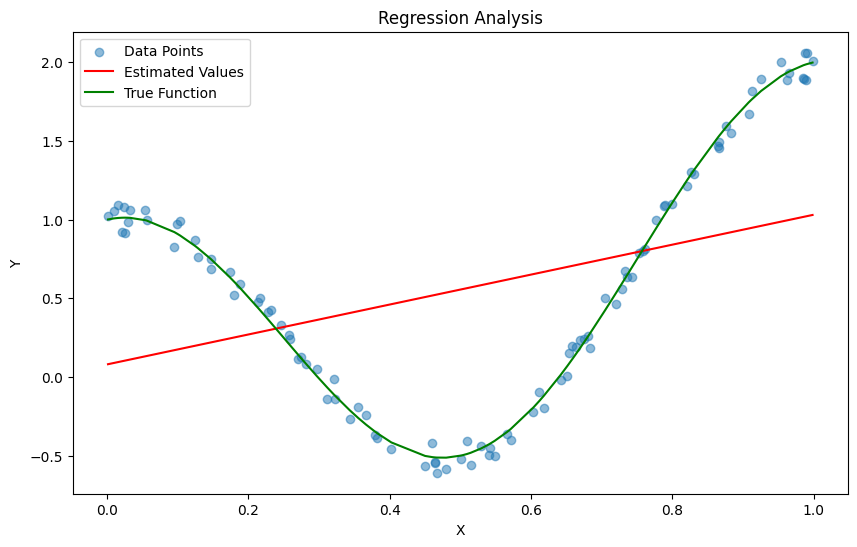

In [26]:
# draw the plot
y_true = x_reshape + np.cos(2*np.pi*x_reshape)
idx = np.argsort(X)

plt.figure(figsize=(10, 6))

plt.scatter(X, Y, alpha=0.5, label="Data Points") # samples
plt.plot(X[idx], df.y_pred[idx], 'r-', label="Estimated Values") # estimated values
plt.plot(x_reshape[idx], y_true[idx], 'g-', label="True Function") # true values

# plot format
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Analysis')
plt.legend()

plt.show()

In [34]:
# the estimated values when x=0.5
f_est = model.predict([[0.5]])[0]
print(f"The predicted value when x=0.5: {f_est}"),

The predicted value when x=0.5: [0.55584839]


**(d) Now construct 500 simulated datasets, each with 100 samples. Denote the datasets by** $\{\mathcal{D_1}\dots,\mathcal{D_{500}}\}$. **For each dataset,** $\mathcal{D_i}$ **, fit a new `LinearRegression` model and calculate** $\hat{f}(0.5, \mathcal{D})$. **Store these estimates in a 500-dimensional vector,** 
$$\text{preds}=(\hat{f}(0.5, \mathcal{D_1}),\dots,\hat{f}(0.5, \mathcal{D_{500}}))$$

**Plot a histogram of `preds`**

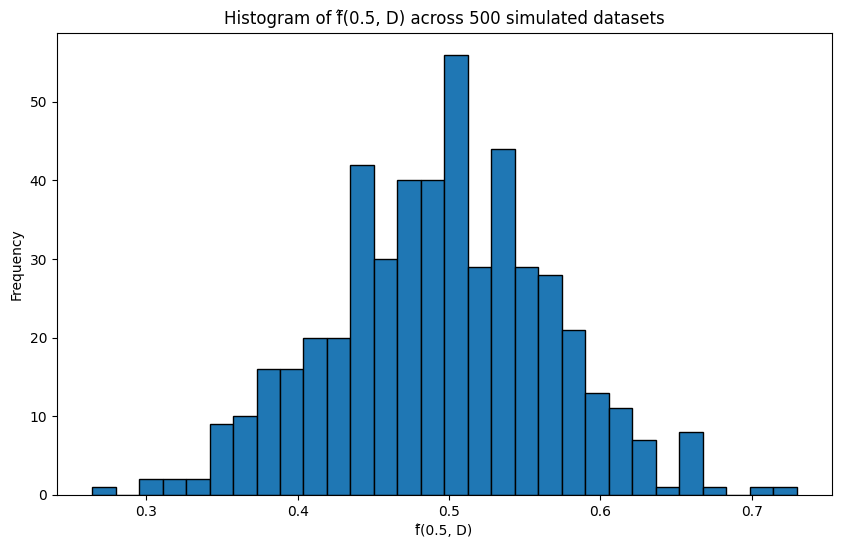

In [39]:
np.random.seed(503)

preds = np.zeros(500)

for i in range(500):
    X = np.random.uniform(0,1,100)
    Y = np.random.uniform(X+np.cos(2*np.pi*X)-0.1, X+np.cos(2*np.pi*X)+0.1)

    model = LinearRegression()
    model.fit(X.reshape(-1,1), Y)

    preds[i] = model.predict([[0.5]])[0]

plt.figure(figsize=(10, 6))
plt.hist(preds, bins=30, edgecolor='black')
plt.xlabel('f̂(0.5, D)')
plt.ylabel('Frequency')
plt.title('Histogram of f̂(0.5, D) across 500 simulated datasets')
# plt.grid(True)
plt.show()

**(e) Compare the mean value fo `preds` to the value you computed in part(a) of this problem. What does this suggest about the bias of the ordinary least squares estimator** $\hat{f}(0.5, \mathcal{D})$

In [40]:
print(f"The mean value of 500 predicted values: {np.mean(preds)}")
print(f"The bias of the OLS: {np.mean(preds)+0.5}")

The mean value of 500 predicted values: 0.49407862962132
The bias of the OLS: 0.99407862962132


**(f) Compute the variance of `preds`. What does this say about the variance of
the ordinary least squares estimator** $\hat{f}(0.5, \mathcal{D})$p

In [38]:
print(f"The variance of 500 predictions: {np.var(preds)}")

The variance of 500 predictions: 0.005288361134121971


The variance of the OLS estimator is.

**(g) Suppose we gathered a new dataset with 100 samples and fit a linear regression model. Now imagine we observe a new sample with** $X = 0.5$ **and use our model to predict** $Y$ **. Estimate the expected value of the squared error of our prediction. Note: the expectation should average over randomness in the training dataset as well as randomness in the test sample** $(X,Y)$.

According to previous answers,
$$
\begin{align*}
f(0.5) &= \mathbb{E}[Y|X=0.5]=-0.5 \\
\text{var}[Y|X=0.5] &= \cfrac{1}{300} \\
\mathbb{E}[\hat{f}|X=0.5] &= 0.494 \\
\text{var}[\hat{f}|X=0.5] &= 0.005 \\
\end{align*}
$$

Therefore, the expected value of squared error of the prediction:
$$
\begin{align*}
\mathbb{E}[(\hat{f}-Y)^2] &= \text{Bias}^2+\text{Var}+\text{Var}[Y|X=0.5] \\
&= (\mathbb{E}(\hat{f})-\mathbb{E}[Y|X=0.5])^2+\text{var}[\hat{f}|X=0.5]+\text{Var}[Y|X=0.5] \\
&\approx 0.994^2+0.005+1/300 \\
&\approx 0.996
\end{align*}
$$